In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, RandomFlip# type: ignore
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.applications import VGG16

from sklearn.metrics import confusion_matrix
main_path = "C:\\Users\\munod\\OneDrive\\Documents\Datasets\\Caltech 256 Image Dataset\\256_ObjectCategories"
directories = os.listdir(main_path)
images = []
labels = []
for direct in directories:
    #print(direct)
    path1 = main_path+"\\"+direct
    files = os.listdir(path1)
    if direct == "Normal" or direct == "Tuberculosis":
        counter_limit = 1000
        code = 1
    else:
        counter_limit = 10
        code = 0
    
    counter = 0
    for file in files:
        if counter <counter_limit:
            try:
                img = cv2.imread(main_path+"\\"+direct+"\\"+file)
                img = cv2.resize(img, (156,156))
                labels.append(code)
                images.append(img)
                counter += 1
            except:
                pass


Pass  001.ak47
Pass  002.american-flag
Pass  003.backpack
Pass  004.baseball-bat
Pass  005.baseball-glove
Pass  006.basketball-hoop
Pass  007.bat
Pass  008.bathtub
Pass  009.bear
Pass  010.beer-mug
Pass  011.billiards
Pass  012.binoculars
Pass  013.birdbath
Pass  014.blimp
Pass  015.bonsai-101
Pass  016.boom-box
Pass  017.bowling-ball
Pass  018.bowling-pin
Pass  019.boxing-glove
Pass  020.brain-101
Pass  021.breadmaker
Pass  022.buddha-101
Pass  023.bulldozer
Pass  024.butterfly
Pass  025.cactus
Pass  026.cake
Pass  027.calculator
Pass  028.camel
Pass  029.cannon
Pass  030.canoe
Pass  031.car-tire
Pass  032.cartman
Pass  033.cd
Pass  034.centipede
Pass  035.cereal-box
Pass  036.chandelier-101
Pass  037.chess-board
Pass  038.chimp
Pass  039.chopsticks
Pass  040.cockroach
Pass  041.coffee-mug
Pass  042.coffin
Pass  043.coin
Pass  044.comet
Pass  045.computer-keyboard
Pass  046.computer-monitor
Pass  047.computer-mouse
Pass  048.conch
Pass  049.cormorant
Pass  050.covered-wagon
Pass  051.

In [3]:
images = np.asarray(images)
labels = np.asarray(labels)
display("Shape of Images" , images.shape, "Label Shape", labels.shape)

'Shape of Images'

(2285, 156, 156, 3)

'Label Shape'

(2285,)

In [4]:
data = images/255.0

In [5]:
X_train,X_test_combined, y_train, y_test_combined = train_test_split(data, labels, test_size=0.4, shuffle=True)


In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test_combined, y_test_combined, test_size=0.5, shuffle=True)

In [7]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(156, 156, 3))

In [8]:


x = base_model.output
print(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

<KerasTensor shape=(None, 4, 4, 512), dtype=float32, sparse=False, name=keras_tensor_18>


In [9]:
for layer in model.layers[:-3]:
    layer.trainable = False
    

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - binary_accuracy: 0.8505 - loss: 0.4508 - val_binary_accuracy: 0.9934 - val_loss: 0.0338
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - binary_accuracy: 0.9985 - loss: 0.0032 - val_binary_accuracy: 0.9934 - val_loss: 0.0381
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - binary_accuracy: 1.0000 - loss: 0.0023 - val_binary_accuracy: 0.9934 - val_loss: 0.0252
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - binary_accuracy: 1.0000 - loss: 8.1790e-04 - val_binary_accuracy: 0.9956 - val_loss: 0.0256
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - binary_accuracy: 1.0000 - loss: 9.6609e-04 - val_binary_accuracy: 0.9956 - val_loss: 0.0274
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - binary_accuracy: 1.0000 - loss: 2.7524e-04 - val_binary_accuracy: 0.9956 - val_loss: 0.0259
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - binary_accuracy: 1.0000 - loss: 1.7493e-04 - val_binary_accuracy: 0.9956 - val_loss: 0.0245
Epoc

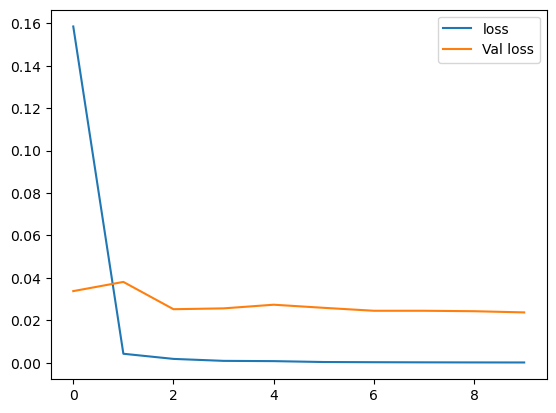

In [12]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

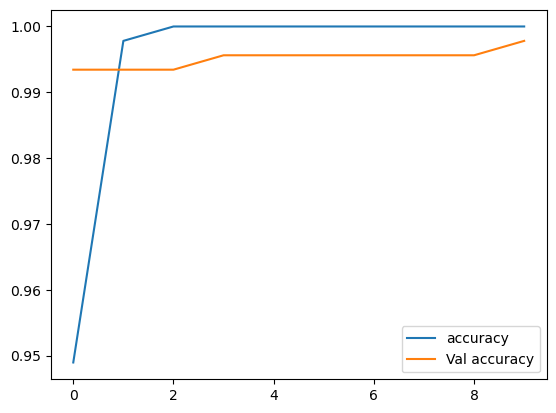

In [13]:
plt.plot(model.history.history['binary_accuracy'], label='accuracy')
plt.plot(model.history.history['val_binary_accuracy'], label='Val accuracy')
plt.legend()
plt.show()

In [14]:
result = model.evaluate(X_test, y_test, batch_size=32)


print(f'The accuracy is {result[1]}')
print(f'The loss is {result[0]}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - binary_accuracy: 1.0000 - loss: 7.6710e-04
The accuracy is 1.0
The loss is 0.0009652604348957539


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


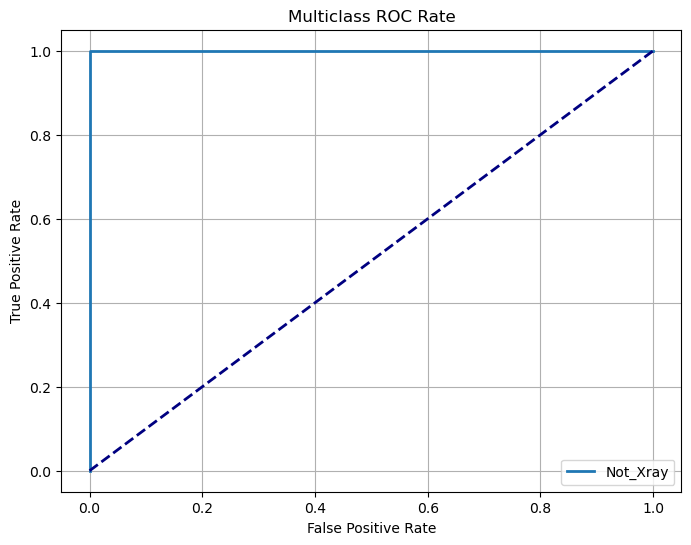

AUROC for class Not_Xray : 1.000


In [16]:
y_true = y_test
n_classes = 2
fpr = {}
tpr = {}
# roc_auc = {}
classes_names = {0:"Xray", 1:"Not_Xray"}
classes_names_list = ["Not_Xray"]


fpr, tpr,  _ =  roc_curve(y_true, y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))

plt.plot(
    fpr, tpr, 
    lw=2,
    label=f"Class {1} (area = {roc_auc:.3f})"
)

plt.plot([0,1], [0,1], color="navy", lw=2, linestyle= "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Rate")
plt.legend(classes_names_list, loc="lower right")
plt.grid()
plt.show()


print(f"AUROC for class {classes_names[1]} : {roc_auc:.3f}")


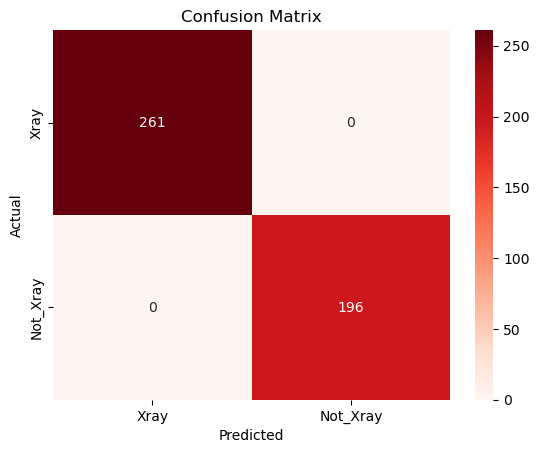

In [17]:
cm = confusion_matrix(y_true=y_true, y_pred=np.round(y_pred))

sns.heatmap(cm, cmap="Reds", 
            annot=True, 
            fmt='g',
            xticklabels=["Xray","Not_Xray"],
            yticklabels=["Xray","Not_Xray"],
            )

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
print(f"Sensitivity to correctly classifiy a CXR with TB {cm[1][1]/(cm[1][1]+cm[1][0]):.3f}")
print(f"Specificity to correctly classifiy a CXR with TB {cm[1][1]/(cm[1][1]+cm[0][1]):.3f}")

Sensitivity to correctly classifiy a CXR with TB 1.000
Specificity to correctly classifiy a CXR with TB 1.000


In [19]:

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 156, 156, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 156, 156, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 156, 156, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 78, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 78, 78, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 78, 78, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 39, 39, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 39, 39, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 39, 39, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 39, 39, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 19, 19, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 19, 19, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,007,685 (80.14 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,195,332 (16.00 MB)

In [20]:
model.save("cxr_or_not_vgg16_model.keras")

In [21]:
from tensorflow.keras.models import load_model
model = load_model("cxr_or_not_vgg16_model.keras")

Next Steps
1. Train on more data
2. Augument the Data
3. Create a model that identifies if an image is a CXR before predicting if TB is present or not 
4. Send an Alert is TB is likely
5. Segment Abnormal area

In [22]:
x_ray_path = ""
other_pics = ""
